<a href="https://colab.research.google.com/github/Sarath-Mohan9469545/computing_lab_exp/blob/main/decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
file=pd.read_csv("/content/bank-direct-marketing-campaigns.csv")
print(file)


       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  campaign  pdays

In [ ]:
x=file[["job","marital","education","default","housing","loan","poutcome"]]

In [ ]:
y=file["y"]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new=["job","marital","education","default","housing","loan","poutcome"]
file[new]=file[new].apply(LabelEncoder().fit_transform)
x=file[["job","marital","education","default","housing","loan","poutcome"]]
y=file["y"]

In [ ]:
print(x)
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest=tts(x,y,train_size=0.8)

       job  marital  education  default  housing  loan  poutcome
0        3        1          0        0        0     0         1
1        7        1          3        1        0     0         1
2        7        1          3        0        2     0         1
3        0        1          1        0        0     0         1
4        7        1          3        0        0     2         1
...    ...      ...        ...      ...      ...   ...       ...
41183    5        1          5        0        2     0         1
41184    1        1          5        0        0     0         1
41185    5        1          6        0        2     0         1
41186    9        1          5        0        0     0         1
41187    5        1          5        0        2     0         0

[41188 rows x 7 columns]


In [ ]:
from sklearn.tree import DecisionTreeClassifier as dt
ml=dt(max_depth=3,criterion="entropy")
ml=ml.fit(xtrain,ytrain)


In [ ]:
res=ml.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score as acs
acc=acs(ytest,res)
print(acc*100)

89.77907259043457


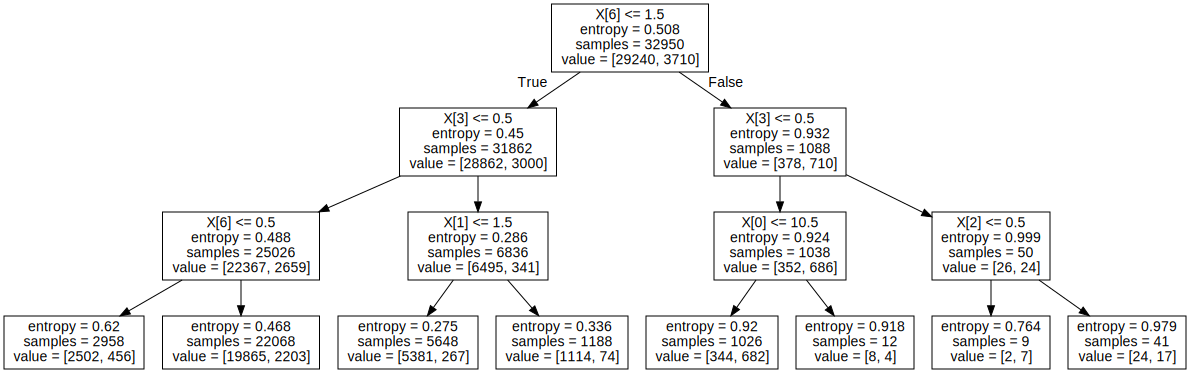

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
import pydotplus
import graphviz
graph=tree.export_graphviz(ml)
graph=graphviz.Source(graph)
graph